# Credit 

- https://www.kaggle.com/itratrahman/nlp-tutorial-using-python

In [49]:

# OP 
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

%matplotlib inline
%pylab inline
import seaborn  as sns 
from matplotlib import pyplot
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


In [34]:
# set plot style
matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10,10)

## 0) Load data 

In [57]:
# help fun 

def get_sentence_length(x):
    return len(x)

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [58]:
# LOAD THE DATA 

df = pd.read_csv('spam.csv', delimiter=',',encoding='latin-1')
df = df.loc[:,['v1','v2']]

# get feature

df['length'] = df['v2'].apply(get_sentence_length)
# remove punctuation
df['v2_del_punct'] = df['v2'].apply(remove_punctuation)
# remove stopwords
df['v2_del_stopword'] = df['v2'].apply(stopwords)


df.head()

,v1,v2,length,v2_del_punct,v2_del_stopword
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazy Available only in ...,"go jurong point, crazy.. available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,U dun say so early hor U c already then say,u dun say early hor... u c already say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah I dont think he goes to usf he lives aroun...,"nah think goes usf, lives around though"


## 1) Data Overview

Text(0.5,1,'Sentence Length Histagram')

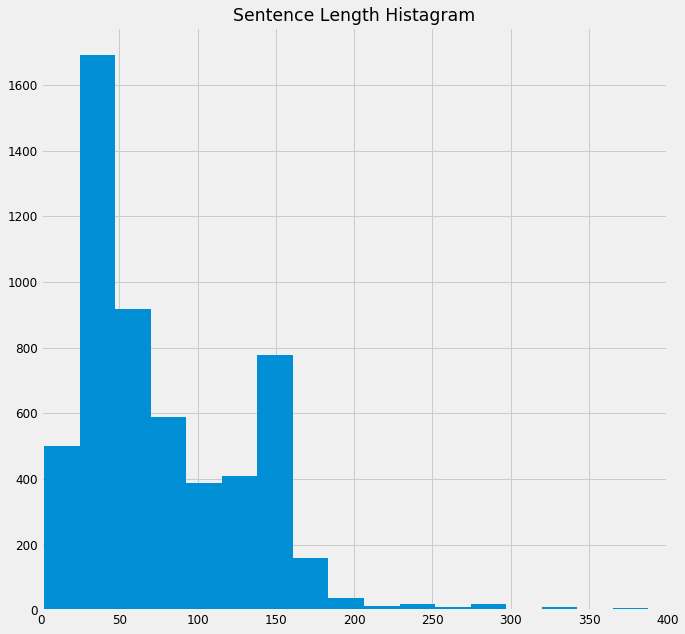

In [45]:
# sentence length hist 

df.length.hist(bins=40)
plt.xlim(0,400)
plt.title('Sentence Length Histagram')

In [6]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)

In [8]:
Y.shape

(5572,)

In [12]:
pd.DataFrame(Y)[0].value_counts()

0    4825
1     747
Name: 0, dtype: int64

In [14]:
X.iloc[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [16]:
X.iloc[1]

'Ok lar... Joking wif u oni...'

## 1) NLP feature extract 

In [55]:
# stop words : show stop words in English 

# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [56]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [59]:
df.head()

,v1,v2,length,v2_del_punct,v2_del_stopword
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go until jurong point crazy Available only in ...,"go jurong point, crazy.. available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,U dun say so early hor U c already then say,u dun say early hor... u c already say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah I dont think he goes to usf he lives aroun...,"nah think goes usf, lives around though"


In [60]:
# Collect vocabulary count


# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['v2_del_stopword'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()  

In [62]:
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [61]:
dictionary

dict_items([('you', 8587), ('frndz', 3385), ('helping', 3810), ('skyped', 6930), ('mornings', 5125), ('jide', 4285), ('did', 2586), ('payback', 5721), ('happening', 3730), ('payee', 5723), ('inconvenience', 4087), ('50rcvd', 620), ('allowed', 1034), ('saturday', 6610), ('heal', 3777), ('ors', 5576), ('subscriptions', 7331), ('luxury', 4772), ('greatly', 3627), ('supreme', 7395), ('gage', 3430), ('asus', 1255), ('auntie', 1288), ('embarassing', 2891), ('sensitive', 6717), ('kissing', 4422), ('falconerf', 3102), ('jap', 4250), ('09061104283', 218), ('srt', 7172), ('09061744553', 232), ('been', 1457), ('portal', 5938), ('infront', 4114), ('tui', 7892), ('or2stoptxt', 5557), ('rs', 6520), ('afraid', 958), ('claypot', 2062), ('urn', 8044), ('collecting', 2131), ('10ppm', 310), ('sunny', 7375), ('upon', 8025), ('pubs', 6130), ('characters', 1948), ('jetton', 4279), ('eggs', 2860), ('charge', 1949), ('nipost', 5344), ('easter', 2825), ('vodafone', 8158), ('hella', 3801), ('gv', 3680), ('try',